### Import Libraries

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
import warnings
warnings.filterwarnings('ignore')

### load Dataset

In [57]:
df = pd.read_csv('dataset/Order.csv')

## Exploratory Data Analyst

In [46]:
df.shape

(1000, 13)

We can see that there are 1000 instances and 13 variables in the data set.

#### Preview the dataset

In [47]:
df.head()

,idOrder,Date,idWarehouse,Channel,Category,idBuyer,Product,Quantity,Revenue,RawMaterial,Handling,Logistic,idSales
0,1,2020-01-02 11:32:21,17,Domestic,Walk-in-Customer,34,Salmon,10.50,2488500,2188261.30,2884.51,15599.49,9
1,2,2020-01-02 13:41:40,12,Export,Horeca,13,Salmon Whole Frozen,27.77,4915290,4582050.00,23821.66,56499.18,7
2,3,2020-01-03 10:21:13,4,Export,Tokopedia,91,Salmon,175.66,39523500,36284710.20,871.76,267430.70,9
3,4,2020-01-05 2:40:13,4,Domestic,Tokopedia,94,Salmon Whole Headless,22.20,3862800,3776042.40,4823.21,88353.54,14
4,5,2020-01-06 12:49:54,6,Domestic,Tokopedia,96,Dori NBL Size 4,40.00,1600000,1373149.45,55168.10,113192.23,9


#### View summary of dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idOrder      1000 non-null   int64  
 1   Date         1000 non-null   object 
 2   idWarehouse  1000 non-null   int64  
 3   Channel      1000 non-null   object 
 4   Category     1000 non-null   object 
 5   idBuyer      1000 non-null   int64  
 6   Product      1000 non-null   object 
 7   Quantity     1000 non-null   float64
 8   Revenue      1000 non-null   int64  
 9   RawMaterial  1000 non-null   float64
 10  Handling     1000 non-null   float64
 11  Logistic     1000 non-null   float64
 12  idSales      1000 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 101.7+ KB


#### Check for missing values

In [22]:
df.isnull().sum()

idOrder        0
Date           0
idWarehouse    0
Channel        0
Category       0
idBuyer        0
Product        0
Quantity       0
Revenue        0
RawMaterial    0
Handling       0
Logistic       0
idSales        0
dtype: int64

### Descriptive statistics with describe() function
Descriptive or summary statistics in python – pandas, can be obtained by using the describe() function. The describe() function gives us the count, mean, standard deviation(std), minimum, Q1(25%), median(50%), Q3(75%), IQR(Q3 - Q1) and maximum values.

In [23]:
df.describe()

,idOrder,idWarehouse,idBuyer,Quantity,Revenue,RawMaterial,Handling,Logistic,idSales
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1000.000000
mean,500.500000,10.088000,52.037000,45.892110,5.067867e+06,4.706057e+06,27154.51533,1.095649e+05,8.823000
std,288.819436,5.567338,29.362387,85.858183,9.447707e+06,9.136549e+06,80792.32792,2.228168e+05,3.783118
min,1.000000,1.000000,1.000000,0.500000,3.500000e+04,1.174111e+04,7.50000,3.990200e+02,1.000000
25%,250.750000,5.000000,27.000000,10.175000,1.077662e+06,9.782497e+05,732.28750,1.488246e+04,8.000000
50%,500.500000,10.000000,53.000000,20.000000,2.653998e+06,2.387452e+06,2887.83500,3.553563e+04,9.000000
75%,750.250000,15.000000,79.000000,40.000000,4.948258e+06,4.655364e+06,12603.94250,1.172533e+05,11.000000
max,1000.000000,19.000000,100.000000,997.270000,1.475960e+08,1.493151e+08,737169.66000,3.645973e+06,16.000000


In [24]:
df.describe(include=['object'])

,Date,Channel,Category,Product
count,1000,1000,1000,1000
unique,1000,2,4,89
top,2020-01-02 11:32:21,Export,Horeca,Salmon
freq,1,504,294,271


In [25]:
df.describe(include='all')

,idOrder,Date,idWarehouse,Channel,Category,idBuyer,Product,Quantity,Revenue,RawMaterial,Handling,Logistic,idSales
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1000.000000
unique,NaN,1000,NaN,2,4,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-01-02 11:32:21,NaN,Export,Horeca,NaN,Salmon,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,504,294,NaN,271,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,10.088000,NaN,NaN,52.037000,NaN,45.892110,5.067867e+06,4.706057e+06,27154.51533,1.095649e+05,8.823000
std,288.819436,NaN,5.567338,NaN,NaN,29.362387,NaN,85.858183,9.447707e+06,9.136549e+06,80792.32792,2.228168e+05,3.783118
min,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.500000,3.500000e+04,1.174111e+04,7.50000,3.990200e+02,1.000000
25%,250.750000,NaN,5.000000,NaN,NaN,27.000000,NaN,10.175000,1.077662e+06,9.782497e+05,732.28750,1.488246e+04,8.000000
50%,500.500000,NaN,10.000000,NaN,NaN,53.000000,NaN,20.000000,2.653998e+06,2.387452e+06,2887.83500,3.553563e+04,9.000000
75%,750.250000,NaN,15.000000,NaN,NaN,79.000000,NaN,40.000000,4.948258e+06,4.655364e+06,12603.94250,1.172533e+05,11.000000


### Computation of measures of central tendency
In this section, I will compute the measures of central tendency - mean, median and mode.

These statistics give us a approximate value of the middle of a numeric variable.

I will use the Revenue variable for calculations.

In [26]:
mean = df['Revenue'].mean()

print(mean)

5067866.722


In [27]:
median = df['Revenue'].median()

print(median)

2653997.5


In [28]:
mode = df['Revenue'].mode()

print(mode)

0    670000
1    970000
Name: Revenue, dtype: int64


### Observation
We can see that mean > median > mode. So, the distribution of Revenue is positively skewed. I will plot its distribution to confirm the same.

<Axes: xlabel='Revenue', ylabel='Density'>

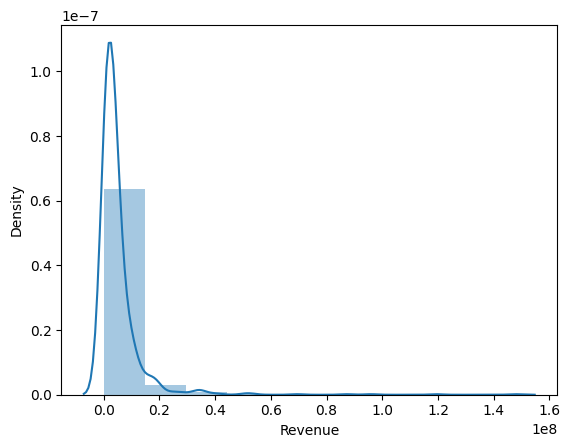

In [49]:
data = df['Revenue']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'Revenue')

### Computation of measures of dispersion or variability
In this section, I will compute the measures of dispersion or variability - minimum and maximum values, range, variance, standard-deviation, IQR.

Again, I will use the Revenue variable for calculations.

#### Minimum value

In [30]:
df['Revenue'].min()

35000

#### Maximum value

In [31]:
df['Revenue'].max()

147595960

#### Range

In [32]:
df['Revenue'].max() - df['Revenue'].min()

147560960

#### Variance

In [33]:
df['Revenue'].var()

89259160322508.06

#### Standar Deviance

In [34]:
df['Revenue'].std()

9447706.617084809

#### Median (Q2 or 50th percentile)

In [35]:
Q2 = df['Revenue'].quantile(0.5)

Q2

2653997.5

#### Q3 or 75th percentile

In [36]:
Q3 = df['Revenue'].quantile(0.75)

Q3

4948257.5

#### Q1 or 25th percentile

In [37]:
Q1 = df['Revenue'].quantile(0.25)

Q1

1077662.5

#### Interquartile Range

In [38]:
IQR = Q3  - Q1

IQR

3870595.0

#### Draw boxplot

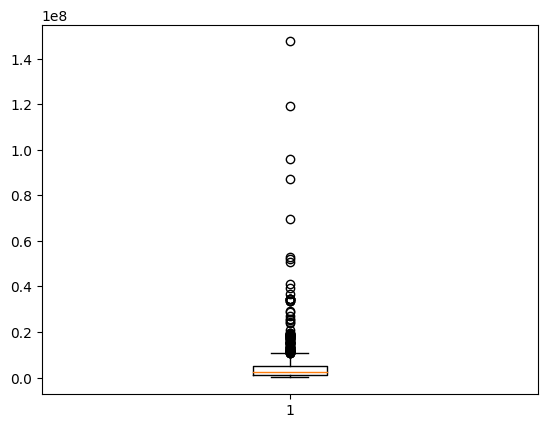

In [39]:
plt.boxplot(df['Revenue'])

plt.show()

### Computation of measures of shape of distribution
In this section, I will compute the measures of shape of distribution - skewness and kurtosis.

Again, I will use the Revenue variable for calculations.

#### Skewness

In [40]:
df['Revenue'].skew()

7.977961686761332

#### Interpretation
I find the skewness to be 7.9779. So, it is greater than 1. Hence, we can conclude that the Revenue data is highly skewed.

In [41]:
df['Revenue'].kurt()

90.57373460030489

#### Interpretation
I find the kurtosis to be 90.5737. So, it is greater than 3 and so excess kurtosis > 0. Hence, we can conclude that the Revenue curve is a leptokurtic curve. As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.

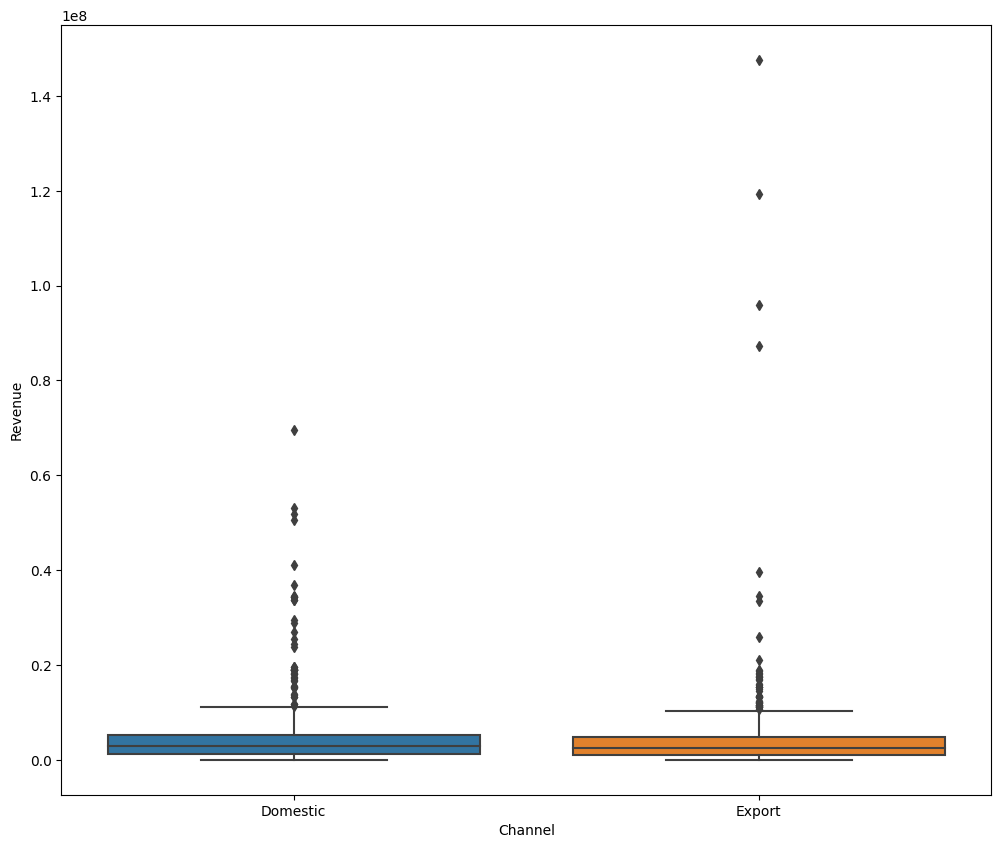

In [59]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Channel', y='Revenue', data=df, orient="v")

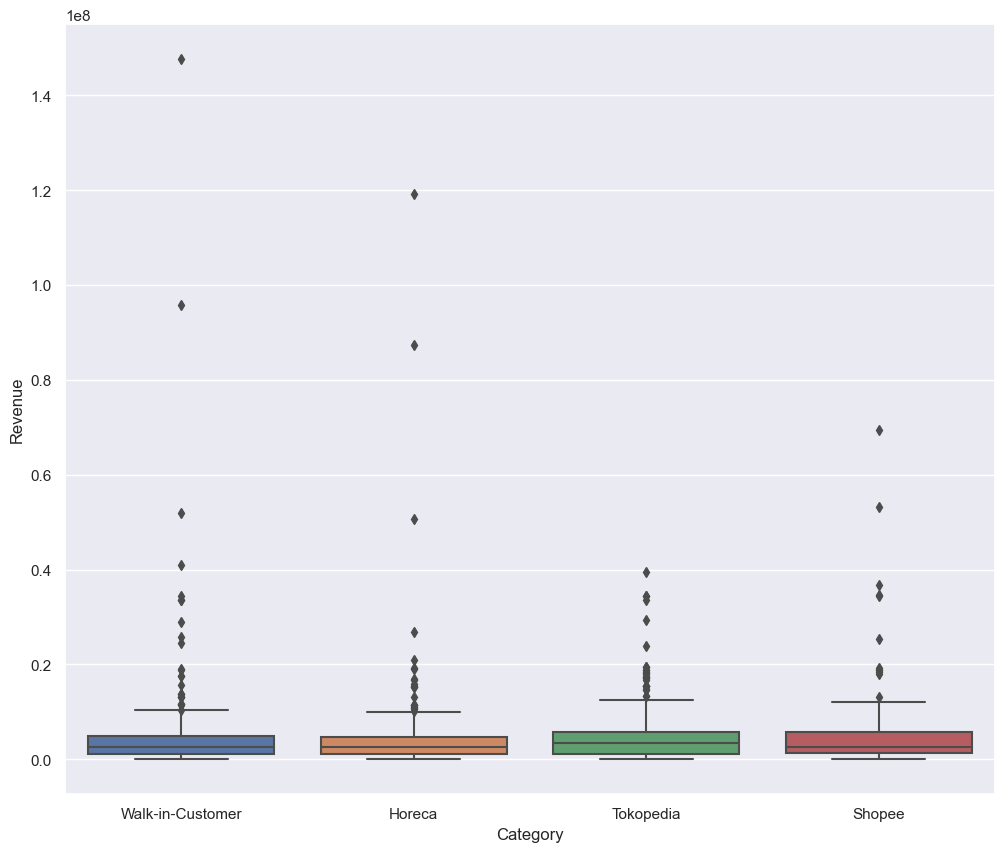

In [73]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Category', y='Revenue', data=df, orient="v")

<Axes: xlabel='Revenue'>

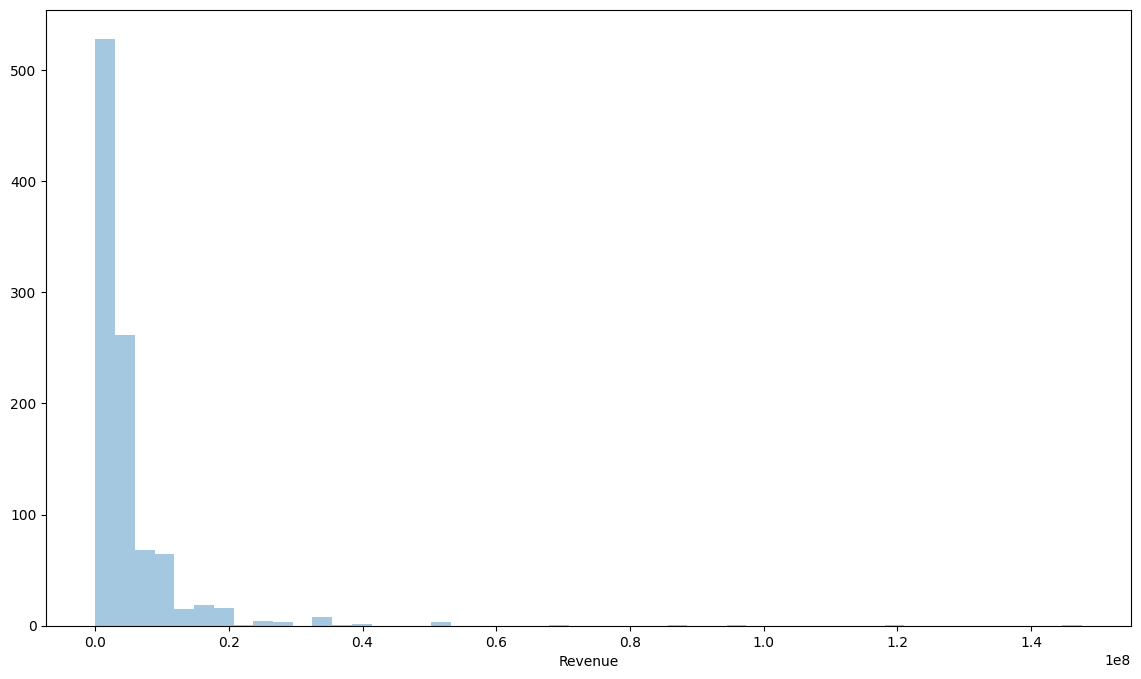

In [60]:
filter_data = df.dropna(subset=['Revenue'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Revenue'], kde=False)

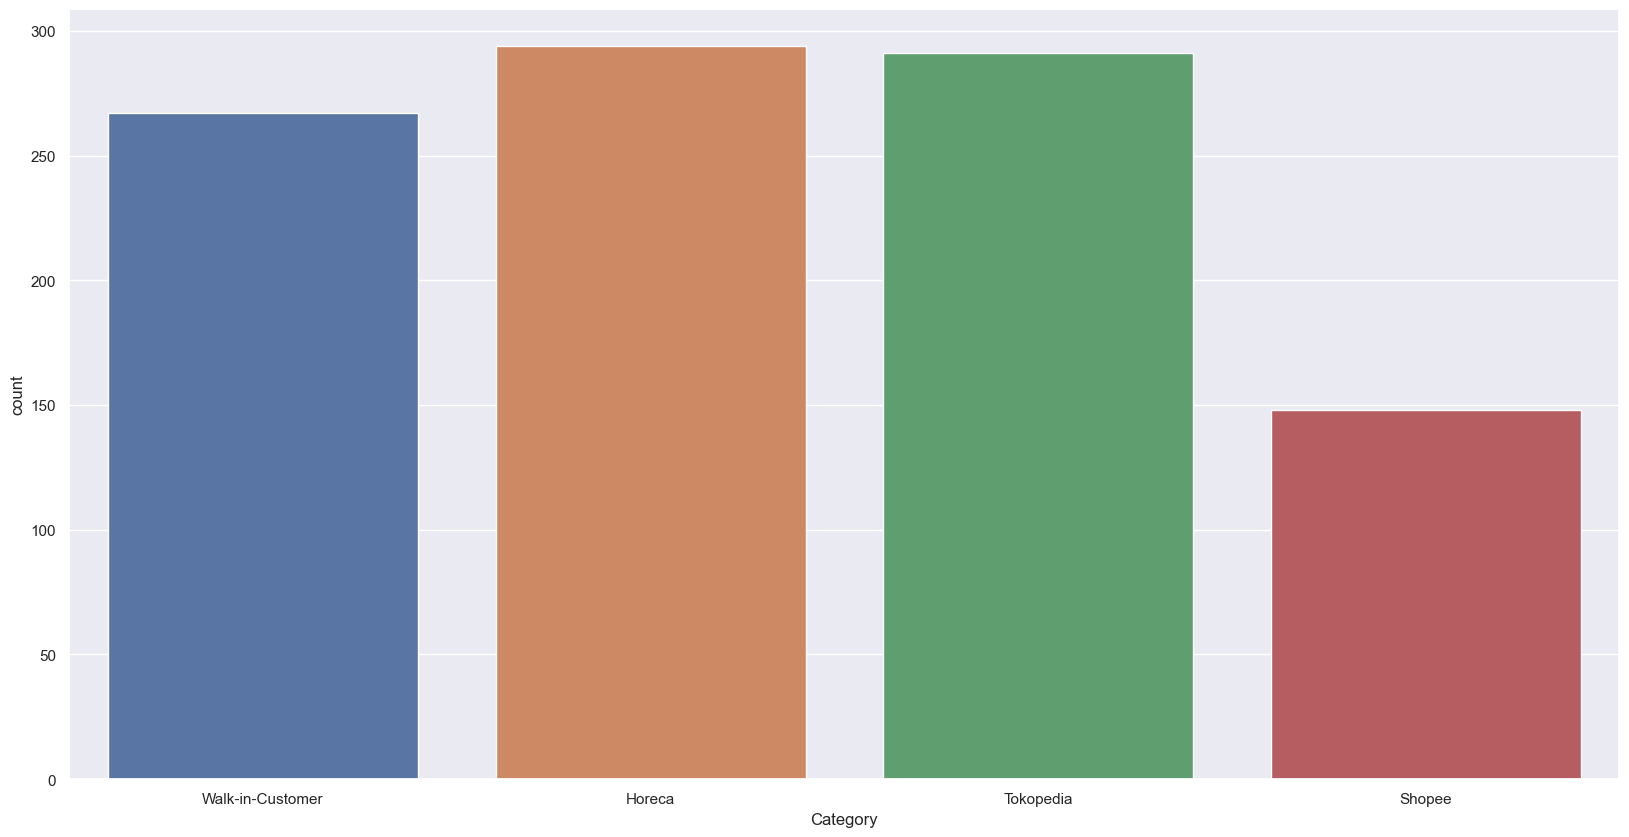

In [72]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Category', data=df)

In [69]:
df['Category'].unique()

array(['Walk-in-Customer', 'Horeca', 'Tokopedia', 'Shopee'], dtype=object)

<Axes: ylabel='category_buyer'>

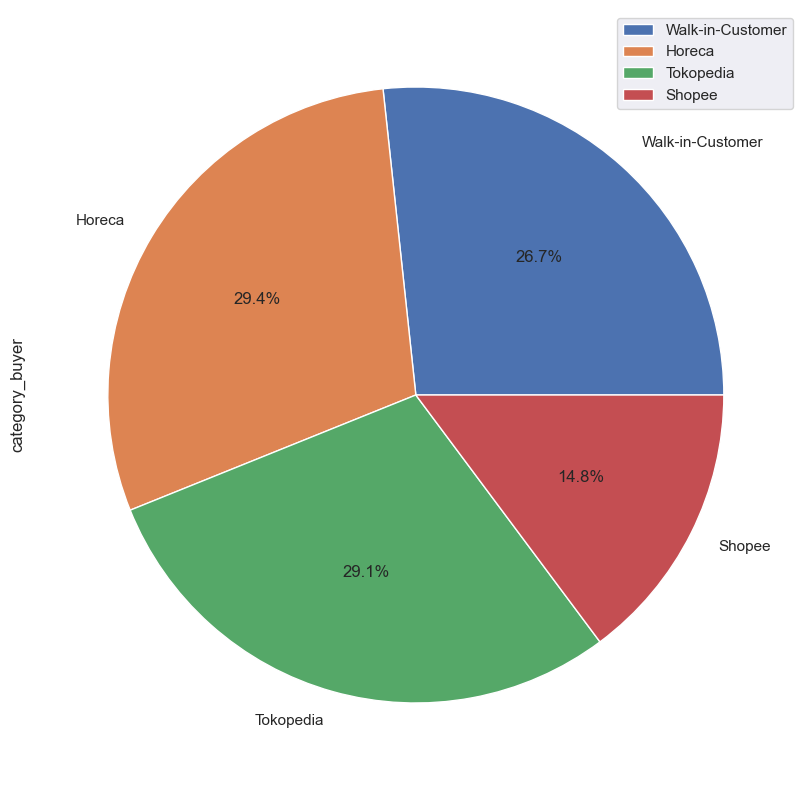

In [71]:
type_counts = df['Category'].value_counts()
df2 = pd.DataFrame(
                    {'category_buyer': type_counts}, 
                   index = ['Walk-in-Customer', 'Horeca', 'Tokopedia', 'Shopee']
                  )
df2.plot.pie(y='category_buyer', figsize=(10,10), autopct='%1.1f%%')

### 2. Results and conclusion
1. In this project, I describe the descriptive statistics that are used to summarize a dataset.
2. In particular, I have described the measures of central tendency (mean, median and mode). I have also described the measures of dispersion or variability (variance, standard deviation, coefficient of variation, minimum and maximum values, IQR) and measures of shape (skewness and kurtosis).
3. I have demonstrated how to calculate the summary statistics with describe() function.
4. I have computed the measures of central tendency-mean, median and mode for the Revenue variable. I have found mean > median > mode. So, the distribution of Revenue is positively skewed. I have plotted its distribution to confirm the same.
5. I have computed the measures of dispersion or variability-range, variance, standard-deviation, median and IQR for the Revenue variable.
6. I have also computed the measures of shape-skewness and kurtosis for the Revenue (in millions)variable.
7. I find the skewness to be 7.9779. So, it is greater than 1. Hence, we can conclude that the Revenue data is highly skewed.
8. I find the kurtosis to be 90.5737. So, it is greater than 3 and so excess kurtosis > 0. Hence, we can conclude that the Revenue (in millions) curve is a leptokurtic curve. As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.
9. I find Revenue on Export Channel greater than Domestic Channel, So next year we can push sales on Domestic, introduce Aruna to our Traditional Market Domestic. We can collaboration with Online Market daily needs Company


### 3. Bonus

Based on these participation rates, I can observe the following:

- The group notified via WA messages had the highest participation rate (79.17%), followed by the group notified via the fisherman app (67.86%).
- The control group, which relied on offline posters for announcements, had the lowest participation rate (56.28%).

Therefore, it appears that implementing reminder notifications, both via the fisherman app and through WA messages, resulted in higher participation rates compared to the existing method of offline poster announcements.

#### Suggestions:

1. Based on the experimental results, it seems beneficial to continue implementing reminder notifications via both the fisherman app and WA messages to increase fisherman participation in the engagement program.
2. Consider further analyzing the cost and feasibility of each notification method to determine the most effective and efficient approach for future engagements.
3. Explore other potential communication channels or strategies to improve participation rates even further such as Whatsapp Group fisherman, create agents from fisherman's wife, give them bonus